# Lecture 22: Data Visualization

CSCI 1360: Foundations for Informatics and Analytics

## Overview and Objectives

Data visualization is one of, if not **the**, most important method of communicating data science results. It's analogous to writing: if you can't visualize your results, you'll be hard-pressed to convince anyone else of them. By the end of this lecture, you should be able to

 - Define and describe some types of plots and what kinds of data they're used to visualize
 - Use the basic functionality of `matplotlib` to generate figures
 - Customize the look and feel of figures to suit particular formats

## Part 1: Introduction to `matplotlib`

The Matplotlib package as we know it was originally conceived and designed by John Hunter in 2002, originally built as an IPython plugin to enable Matlab-style plotting.

IPython's creator, Fernando Perez, was at the time finishing his PhD and didn't have time to fully vet John's patch. So John took his fledgling plotting library and ran with it, releasing Matplotlib version 0.1 in 2003 and setting the stage for what would be the most flexible and cross-platform Python plotting library to date.

Matplotlib can run on a wide variety of operating systems and make use of a wide variety of graphical backends. Hence, despite some developers complaining that it can feel bloated and clunky, it easily maintains the largest active user base and team of developers, ensuring it will remain relevant in some sense for quite some time yet.

You've seen snippets of matplotlib in action in several assignments and lectures, but we haven't really formalized it yet. Like NumPy, matplotlib follows some use conventions.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

By far, we'll use the `plt` object from the second import the most; that contains the main plotting library.

### Plotting in a script

Let's say you're coding a standalone Python application, contained in a file `myapp.py`. You'll need to explicitly tell matplotlib to generate a figure and display it, via the `show()` command.

<img src="https://raw.githubusercontent.com/eds-uga/csci1360e-su16/master/lectures/script.png" width="50%" />

Then you can run the code from the command line:

<pre>$ python myapp.py</pre>

**Beware**: `plt.show()` does a lot of things under-the-hood, including interacting with your operating system's graphical backend.

Matplotlib hides all these details from you, but as a consequence you should be careful to only use `plt.show()` *once* per Python session.

Multiple uses of `show()` can lead to unpredictable behavior that depends entirely on what backend is in use, so try your best to avoid it.

### Plotting in a shell (e.g., IPython)

Remember back to our first lecture, when you learned how to fire up a Python prompt on the terminal? You can plot in that shell just as you can in a script!

<img src="https://raw.githubusercontent.com/eds-uga/csci1360e-su16/master/lectures/shell.png" width="75%" />

In addition, you can enter "matplotlib mode" by using the `%matplotlib` magic command in the IPython shell. You'll notice in the above screenshot that the prompt is hovering below line [6], but no line [7] has emerged. That's because the shell is currently *not* in matplotlib mode, so it will wait indefinitely until you close the figure on the right.

By contrast, in matplotlib mode, you'll immediately get the next line of the prompt *while* the figure is still open. You can then edit the properties of the figure dynamically to update the plot. To force an update, you can use the command `plt.draw()`.

### Plotting in a notebook (e.g., Jupyter)

This is probably the mode you're most familiar with: plotting in a notebook, such as the one you're viewing right now.

Since matplotlib's default is to render its graphics in an external window, for plotting in a notebook you will *have* to specify otherwise, as it's impossible to do this in a browser. You'll once again make use of the `%matplotlib` magic command, this time with the `inline` argument added to tell matplotlib to embed the figures into the notebook itself.

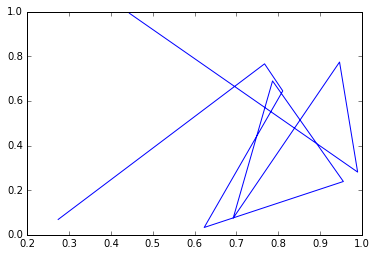

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.random.random(10)
y = np.random.random(10)
plt.plot(x, y)

Note that you do **NOT** need to use `plt.show()`! When in "inline" mode, matplotlib will automatically render whatever the "active" figure is as soon as you issue some kind of plotting command.

### Saving plots to files

Sometimes you'll want to save the plots you're making to files for use later, perhaps as part of a presentation to demonstrate to your bosses what you've accomplished.

In this case, you once again won't use the `plt.show()` command, but instead substitute in the `plt.savefig()` command.

<img src="https://raw.githubusercontent.com/eds-uga/csci1360e-su16/master/lectures/savefig.png" width="75%" />

An image file will be created (in this case, `fig.png`) on the filesystem with the plot.

Matplotlib is designed to operate nicely with lots of different output formats; PNG was just the example used here.

The output format is inferred from the filename used in `savefig()`. You can see all the other formats matplotlib supports with the command

In [3]:
fig = plt.figure()
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

## Part 2: Basics of plotting

Ok, let's dive in with some plotting examples and how-tos!

The most basic kind of plot you can make is the *line plot*. This kind of plot uses `(x, y)` coordinate pairs and implicitly draws lines between them. Here's an example:

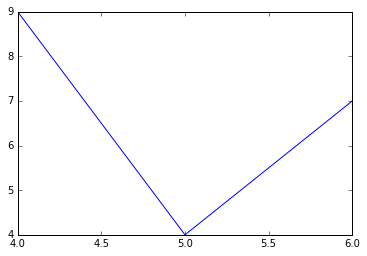

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([4, 5, 6])
y = np.array([9, 4, 7])
plt.plot(x, y)

Matplotlib sees we've created points at (4, 9), (5, 4), and (6, 7), and it connects each of these in turn with a line, producing the above plot. It also automatically scales the x and y axes of the plot so all the data fit visibly inside.

An important side note: matplotlib is *stateful*, which means it has some memory of what commands you've issued. So if you want to, say, include multiple different plots on the same figure, all you need to do is issue additional plotting commands.

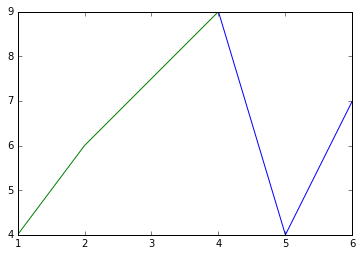

In [5]:
x1 = np.array([4, 5, 6])
y1 = np.array([9, 4, 7])
plt.plot(x1, y1)
x2 = np.array([1, 2, 4])
y2 = np.array([4, 6, 9])
plt.plot(x2, y2)

They'll even be plotted in different colors. How nice!

Line plots are nice, but let's say I really want a *scatter plot* of my data; there's no real concept of a line, but instead I have disparate data points in 2D space that I want to visualize. There's a function for that!

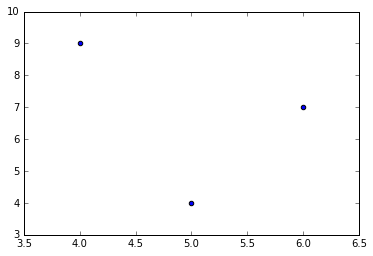

In [6]:
x = np.array([4, 5, 6])
y = np.array([9, 4, 7])
plt.scatter(x, y)

We use the `plt.scatter()` function, which operates pretty much the same way as `plt.plot()`, except it puts dots in for each data point *without* drawing lines between them.

Another very useful plot, especially in scientific circles, is the *errorbar plot*. This is a lot like the line plot, except each data point comes with an errorbar to quantify uncertainty or variance present in each datum.

<Container object of 3 artists>

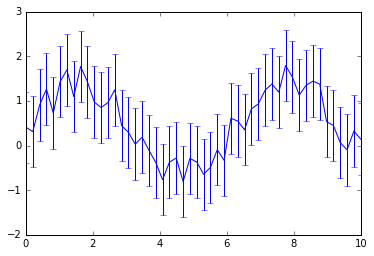

In [7]:
# This is a great function that gives me 50 evenly-spaced values from 0 to 10.
x = np.linspace(0, 10, 50)

dy = 0.8  # The error rate.
y = np.sin(x) + dy * np.random.random(50)  # Adds a little bit of noise.

plt.errorbar(x, y, yerr = dy)

You use the `yerr` argument of the function `plt.errorbar()` in order to specify what your error rate in the y-direction is. There's also an `xerr` optional argument, if your error is actually in the x-direction.

What about that statistics lecture we had not so long ago? We have a bunch of numbers and would like to visualize how they are distributed to see if we can make any inferences and predictions about that. Histograms to the rescue!

(array([  2.,   2.,   5.,   5.,   5.,   5.,  13.,  10.,  15.,   9.,  10.,
          4.,   2.,   6.,   2.,   2.,   1.,   0.,   1.,   1.]),
 array([-2.15553666, -1.88773054, -1.61992441, -1.35211829, -1.08431217,
        -0.81650605, -0.54869993, -0.28089381, -0.01308769,  0.25471843,
         0.52252455,  0.79033067,  1.05813679,  1.32594292,  1.59374904,
         1.86155516,  2.12936128,  2.3971674 ,  2.66497352,  2.93277964,
         3.20058576]),
 <a list of 20 Patch objects>)

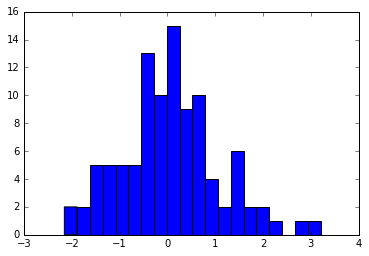

In [8]:
x = np.random.normal(size = 100)
plt.hist(x, bins = 20)

`plt.hist()` has only 1 required argument: a list of numbers. However, the optional `bins` argument is very useful, as it dictates how many bins you want to use to divide up the data in the required argument. Too many bins and every bar in the histogram will have a count of 1; too few bins and all your data will end up in just a single bar!

Picking the number of bins for histograms is an art unto itself that usually requires a lot of trial-and-error, hence the importance of having a good visualization setup!

The last type of plot we'll discuss here isn't really a "plot" in the sense as the previous ones have been, but it is no less important: showing images!

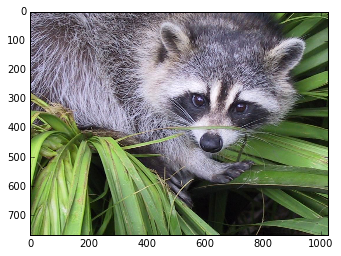

In [9]:
import scipy.misc
img = scipy.misc.face()
plt.imshow(img)

The `plt.imshow()` method takes as input a *matrix* and renders it as an image. If the matrix is 3D, it considers this to be an image in RGB format (width, height, and 3 color dimensions) and uses that information to determine colors. If the matrix is only 2D, it will consider it to be grayscale.

It doesn't even have be a "true" image. Often you want to look at a matrix that you're building, just to get a "feel" for the structure of it. `imshow()` is great for this as well.

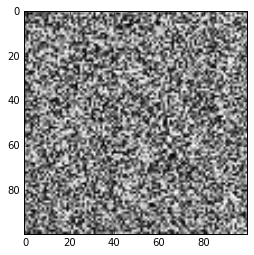

In [10]:
matrix = np.random.random((100, 100))
plt.imshow(matrix, cmap = "gray")

We built a random matrix `matrix`, and as you can see it looks exactly like that: in fact, a lot like TV static (coincidence?...). The `cmap = "gray"` optional argument specifies the "colormap", of which matplotlib has quite a few, but this explicitly enforces the "gray" colormap, otherwise matplotlib will attempt to predict a color scheme.

## Part 3: Customizing the look and feel

You may be thinking at this point: this is all cool, but my inner graphic designer cringed at how a few of these plots looked. Is there any way to make them look, well, "nicer"?

There are, in fact, a couple things we can do to spiff things up a little, starting with how we can annotate the plots in various ways.

### Axis labels and plot titles

You can add text along the axes and the top of the plot to give a little extra information about what, exactly, your plot is visualizing. For this you use the `plt.xlabel()`, `plt.ylabel()`, and `plt.title()` functions.

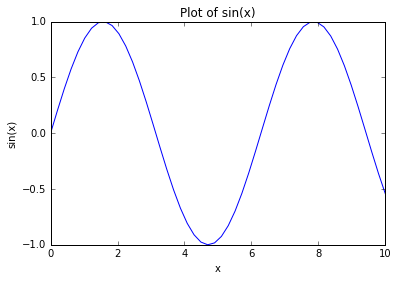

In [11]:
x = np.linspace(0, 10, 50)  # 50 evenly-spaced numbers from 0 to 10
y = np.sin(x)  # Compute the sine of each of these numbers.
plt.plot(x, y)
plt.xlabel("x")  # This goes on the x-axis.
plt.ylabel("sin(x)")  # This goes on the y-axis.
plt.title("Plot of sin(x)")  # This goes at the top, as the plot title.

### Legends

Going back to the idea of plotting multiple datasets on a single figure, it'd be nice to label them in addition to using colors to distinguish them. Luckily, we have legends we can use, but it takes a coordinated effort to use them effectively. Pay close attention:

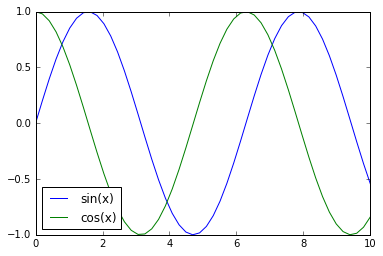

In [12]:
x = np.linspace(0, 10, 50)  # Evenly-spaced numbers from 0 to 10
y1 = np.sin(x)  # Compute the sine of each of these numbers.
y2 = np.cos(x)  # Compute the cosine of each number.

plt.plot(x, y1, label = "sin(x)")
plt.plot(x, y2, label = "cos(x)")
plt.legend(loc = 0)

First, you'll notice that the `plt.plot()` call changed a little with the inclusion of an optional argument: `label`. This string is the label that will show up in the legend.

Second, you'll also see a call to `plt.legend()`. This instructs matplotlib to show the legend on the plot. The `loc` argument specifies the location; "0" tells matplotlib to "put the legend in the best possible spot, respecting where the graphics tend to be." This is usually the best option, but if you want to override this behavior and specify a particular location, the numbers 1-9 refer to different specific areas of the plot.

### Axis limits

This will *really* come in handy when you need to make multiple plots that span different datasets, but which you want to compare directly. We've seen how matplotlib scales the axes so the data you're plotting are visible, but if you're plotting the data in entirely separate figures, matplotlib may scale the figures differently. If you need set explicit axis limits:

(-3, 3)

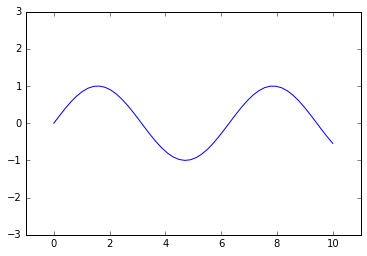

In [13]:
x = np.linspace(0, 10, 50)  # Evenly-spaced numbers from 0 to 10
y = np.sin(x)  # Compute the sine of each of these numbers.

plt.plot(x, y)
plt.xlim([-1, 11])  # Range from -1 to 11 on the x-axis.
plt.ylim([-3, 3])  # Range from -3 to 3 on the y-axis.

This can potentially help center your visualizations, too.

### Colors, markers, and colorbars

Matplotlib has a default progression of colors it uses in plots--you may have noticed the first data you plot is always blue, followed by green. You're welcome to stick with this, or you can manually override the colors scheme in any plot using the optional argument `c` (for color).

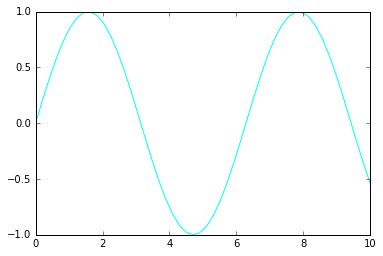

In [14]:
x = np.linspace(0, 10, 50)  # Evenly-spaced numbers from 0 to 10
y = np.sin(x)  # Compute the sine of each of these numbers.

plt.plot(x, y, c = "cyan")

If you're making scatter plots, it can be especially useful to specify the *type* of marker in addition to the color you want to use. This can really help differentiate multiple scatter plots that are combined on one figure.

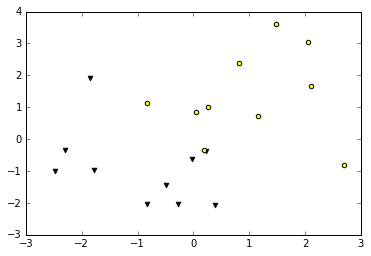

In [15]:
X1 = np.random.normal(loc = [-1, -1], size = (10, 2))
X2 = np.random.normal(loc = [1, 1], size = (10, 2))
plt.scatter(X1[:, 0], X1[:, 1], c = "black", marker = "v")
plt.scatter(X2[:, 0], X2[:, 1], c = "yellow", marker = "o")

Finally, when you're rendering images, and especially matrices, it can help to have a colorbarthat shows the scale of colors you have in your image plot.

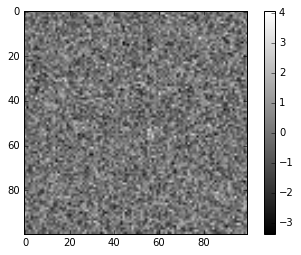

In [16]:
matrix = np.random.normal(size = (100, 100))
plt.imshow(matrix, cmap = "gray")
plt.colorbar()

The matrix is clearly still random, but the colorbar tells us the values in the picture range from around -3.5 or so to +4, giving us an idea of what's in our data.

### `seaborn`

The truth is, there is *endless* freedom in matplotlib to customize the look and feel; you could spend a career digging through the documentation to master the ability to change edge colors, line thickness, and marker transparencies. At least in my opinion, there's a better way.

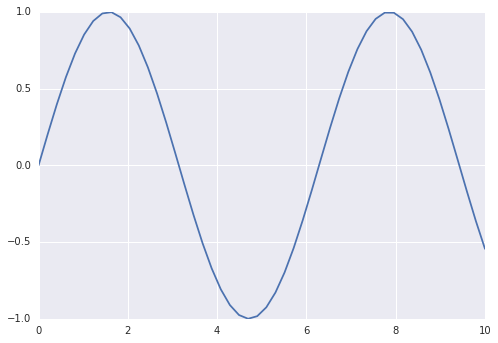

In [17]:
import seaborn as sns  # THIS IS THE KEY TO EVERYTHING

x = np.linspace(0, 10, 50)  # Evenly-spaced numbers from 0 to 10
y = np.sin(x)  # Compute the sine of each of these numbers.

plt.plot(x, y)

The `seaborn` package is a plotting library in its own right, but first and foremost it effectively serves as a "light reskin" of matplotlib, changing the defaults (sometimes drastically) to be much more aesthetically and practically agreeable.

There will certainly be cases where seaborn doesn't solve your plotting issue, but for the most part, I've found `import seaborn` to assuage a lot of my complaints.

## Review Questions

Some questions to discuss and consider:

1: You may have noticed much of the plotting that was done in this lecture relied on *vectorized* plotting, where entire NumPy arrays were fed to matplotlib in one call. The data don't have to be arrays, though; they can be single points fed through a loop. Can you speculate as to why it might be better to use vectorized statements when plotting?

2: There are a lots of other types of plots supported by matplotlib we didn't even touch on: 3D plots, contour plots, wireframe plots, bar plots, heatmaps, subplots, in-plot text annotations, and plotting on maps. Pick one of these and provide an example of where it could be used, especially if you've used it in your own work.

3: Name some useful visualizations for time series data, and what that would correspond to in matplotlib.

4: Name some useful visualizations for a 3D normal random variable.

## Course Administrivia

 - **How is A9?**

 - **A10 is out today.**

 - **Only 1 more assignment! (A11)**

 - **Next week: data exploration and machine learning!**

## Additional Resources

 1. VanderPlas, Jake. *Python Data Science Handbook*. 2015. ISBN-13: 978-1491912058